<a href="https://colab.research.google.com/github/Ai-deen/MachineLearning/blob/main/Taxi_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New York City Taxi Fare Prediction

Train Machine Learning models using training dataset of New York taxi fares and predict fares for test dataset.Take all possible parameters into consideration.

## Data Cleaning and Visualization

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"keiraaideen","key":"fbe008514cce5c79769f8bf40d7d56c4"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

 99% 1.54G/1.56G [00:07<00:00, 265MB/s]
100% 1.56G/1.56G [00:08<00:00, 208MB/s]


In [ ]:
!unzip new-york-city-taxi-fare-prediction

Archive:  new-york-city-taxi-fare-prediction.zip
  inflating: GCP-Coupons-Instructions.rtf  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv("train.csv", nrows = 1000000)
test = pd.read_csv("test.csv")

In [ ]:
trainc = train.copy()

In [ ]:
testc = test.copy()

PART 1 --> DATA CLEANSING 

Will perform the following activities
1.   Shape of train and test sets
2.   Check for NaNs and drop them (if any)
3.   Check for outliers and drop them (if any)
4.   Type conversion of relevant fields





In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))

Shape of the Training data : (1000000, 8)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [ ]:
# Check datatypes & count of not-null values in each field
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [ ]:
# Check datatypes & count of not-null values in each field
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [ ]:
#check for missing values in train data

np.where(train.isnull())[0]


array([120227, 120227, 245696, 245696, 340533, 340533, 428108, 428108,
       471472, 471472, 524834, 524834, 574023, 574023, 580338, 580338,
       794694, 794694, 895400, 895400])

In [ ]:
#check for missing values in test data
np.where(test.isnull())[0]


array([], dtype=int64)

In [ ]:
#drop the missing values
train = train.dropna(axis = 0, how ='any')
train


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


In [ ]:
#drop the missing values
test = test.dropna(axis = 0, how ='any')
test


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [ ]:
#Look for no. of non-positive fare_amount values.
np.where(train['fare_amount'] <= 0)[0]

array([  2039,   2486,  10002,  13032,  27891,  28839,  36722,  42337,
        47302,  56748,  58937,  97838, 102938, 105051, 165146, 175351,
       179310, 182340, 211454, 211498, 266483, 288958, 298410, 301354,
       323635, 331595, 386731, 399782, 427599, 431815, 436654, 443465,
       481414, 489762, 495268, 512489, 519527, 520710, 534745, 549204,
       561780, 577718, 605419, 670246, 681334, 689242, 698279, 738396,
       740834, 743718, 748544, 760654, 762794, 788458, 857254, 857712,
       878014, 888587, 895352, 896057, 897201, 930670, 938010, 942205,
       949554, 957580, 963979])

In [ ]:
# Remove the non-positive fare_amount values.
train = train[train['fare_amount'] > 1]
train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


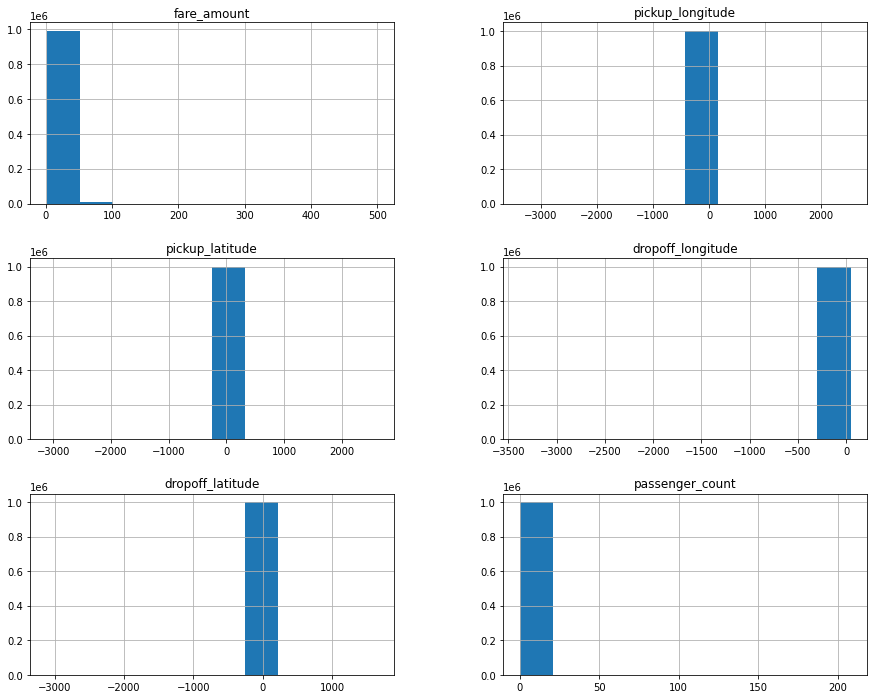

In [ ]:
train.hist(bins=10, figsize=(15,12))
plt.show()

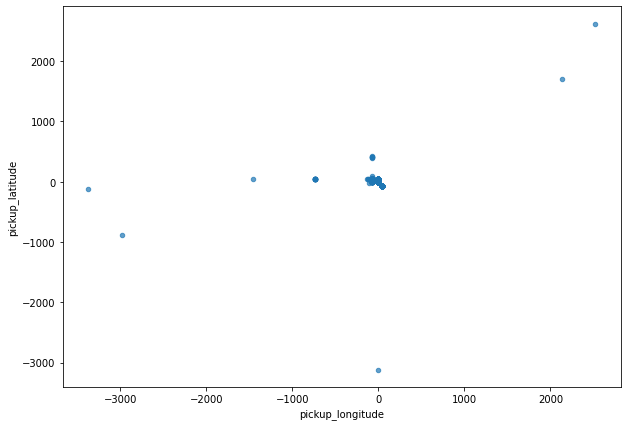

In [ ]:
train.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", figsize=(10, 7), alpha=0.7)
plt.show()

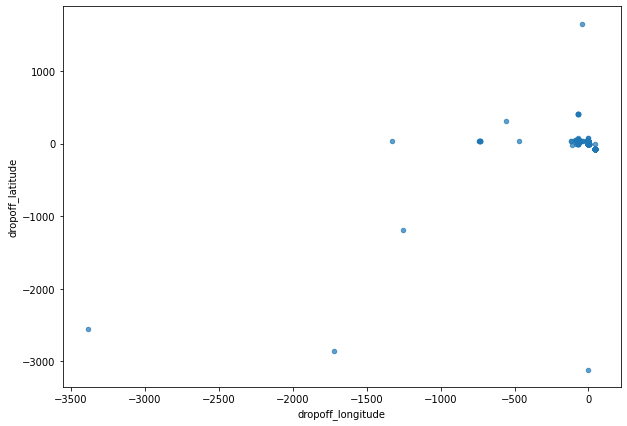

In [ ]:
train.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude", figsize=(10, 7), alpha=0.7)
plt.show()

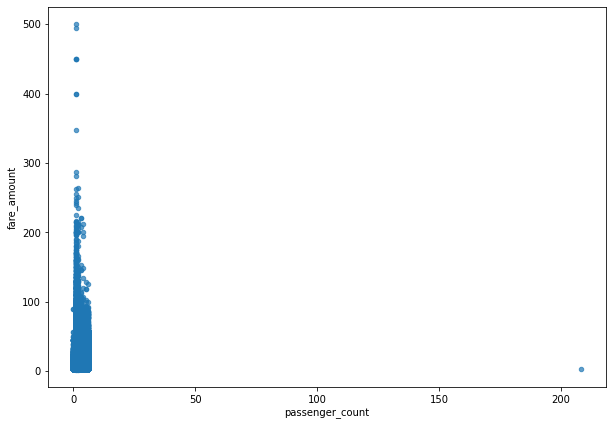

In [ ]:
train.plot(kind="scatter", x="passenger_count", y="fare_amount", figsize=(10, 7), alpha=0.7)
plt.show()

In [ ]:
#Remove outliers


# calculate summary statistics
fare_amount_mean = train["fare_amount"].mean(),
fare_amount_std =  train["fare_amount"].std()
# identify outliers
fare_amount_cut_off = fare_amount_std * 3
lower, upper = fare_amount_mean - fare_amount_cut_off, fare_amount_mean + fare_amount_cut_off
# identify outliers
outliers = [x for x in train["fare_amount"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
train = train[(train["fare_amount"] >= lower[0]) & (train["fare_amount"] <= upper[0])]

Identified outliers: 27000


In [ ]:
pickup_longitude_mean = train["pickup_longitude"].mean(),
pickup_longitude_std =  train["pickup_longitude"].std()
# identify outliers
pickup_longitude_cut_off = pickup_longitude_std * 3
lower, upper = pickup_longitude_mean - pickup_longitude_cut_off, pickup_longitude_mean + pickup_longitude_cut_off
# identify outliers
outliers = [x for x in train["pickup_longitude"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
train = train[(train["pickup_longitude"] >= lower[0]) & (train["pickup_longitude"] <= upper[0])]

Identified outliers: 18715


In [ ]:
pickup_longitude_mean = test["pickup_longitude"].mean(),
pickup_longitude_std =  test["pickup_longitude"].std()
# identify outliers
pickup_longitude_cut_off = pickup_longitude_std * 3
lower, upper = pickup_longitude_mean - pickup_longitude_cut_off, pickup_longitude_mean + pickup_longitude_cut_off
# identify outliers
outliers = [x for x in test["pickup_longitude"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
test = test[(test["pickup_longitude"] >= lower[0]) & (test["pickup_longitude"] <= upper[0])]

Identified outliers: 193


In [ ]:
pickup_latitude_mean = train["pickup_latitude"].mean(),
pickup_latitude_std =  train["pickup_latitude"].std()
# identify outliers
pickup_latitude_cut_off = pickup_latitude_std * 3
lower, upper = pickup_latitude_mean - pickup_latitude_cut_off, pickup_latitude_mean + pickup_latitude_cut_off
# identify outliers
outliers = [x for x in train["pickup_latitude"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
train = train[(train["pickup_latitude"] >= lower[0]) & (train["pickup_latitude"] <= upper[0])]

Identified outliers: 51


In [ ]:
pickup_latitude_mean = test["pickup_latitude"].mean(),
pickup_latitude_std =  test["pickup_latitude"].std()
# identify outliers
pickup_latitude_cut_off = pickup_latitude_std * 3
lower, upper = pickup_latitude_mean - pickup_latitude_cut_off, pickup_latitude_mean + pickup_latitude_cut_off
# identify outliers
outliers = [x for x in test["pickup_latitude"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
test = test[(test["pickup_latitude"] >= lower[0]) & (test["pickup_latitude"] <= upper[0])]

Identified outliers: 85


In [ ]:
dropoff_latitude_mean = train["dropoff_latitude"].mean(),
dropoff_latitude_std =  train["dropoff_latitude"].std()
# identify outliers
dropoff_latitude_cut_off = dropoff_latitude_std * 3
lower, upper = dropoff_latitude_mean - dropoff_latitude_cut_off, dropoff_latitude_mean + dropoff_latitude_cut_off
# identify outliers
outliers = [x for x in train["dropoff_latitude"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
train = train[(train["dropoff_latitude"] >= lower[0]) & (train["dropoff_latitude"] <= upper[0])]

Identified outliers: 735


In [ ]:
dropoff_latitude_mean = test["dropoff_latitude"].mean(),
dropoff_latitude_std =  test["dropoff_latitude"].std()
# identify outliers
dropoff_latitude_cut_off = dropoff_latitude_std * 3
lower, upper = dropoff_latitude_mean - dropoff_latitude_cut_off, dropoff_latitude_mean + dropoff_latitude_cut_off
# identify outliers
outliers = [x for x in test["dropoff_latitude"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
test = test[(test["dropoff_latitude"] >= lower[0]) & (test["dropoff_latitude"] <= upper[0])]

Identified outliers: 190


In [ ]:
dropoff_longitude_mean = train["dropoff_longitude"].mean(),
dropoff_longitude_std =  train["dropoff_longitude"].std()
# identify outliers
dropoff_longitude_cut_off = dropoff_longitude_std * 3
lower, upper = dropoff_longitude_mean - dropoff_longitude_cut_off, dropoff_longitude_mean + dropoff_longitude_cut_off
# identify outliers
outliers = [x for x in train["dropoff_longitude"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
train = train[(train["dropoff_longitude"] >= lower[0]) & (train["dropoff_longitude"] <= upper[0])]

Identified outliers: 115


In [ ]:
dropoff_longitude_mean = test["dropoff_longitude"].mean(),
dropoff_longitude_std =  test["dropoff_longitude"].std()
# identify outliers
dropoff_longitude_cut_off = dropoff_longitude_std * 3
lower, upper = dropoff_longitude_mean - dropoff_longitude_cut_off, dropoff_longitude_mean + dropoff_longitude_cut_off
# identify outliers
outliers = [x for x in test["dropoff_longitude"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
test = test[(train["dropoff_longitude"] >= lower[0]) & (test["dropoff_longitude"] <= upper[0])]

Identified outliers: 212


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
passenger_count_mean = train["passenger_count"].mean(),
passenger_count_std =  train["passenger_count"].std()
# identify outliers
passenger_count_cut_off = passenger_count_std * 3
lower, upper = passenger_count_mean - passenger_count_cut_off, passenger_count_mean + passenger_count_cut_off
# identify outliers
outliers = [x for x in train["passenger_count"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
train = train[(train["passenger_count"] >= lower[0]) & (train["passenger_count"] <= upper[0])]

Identified outliers: 20092


In [ ]:
passenger_count_mean = test["passenger_count"].mean(),
passenger_count_std =  test["passenger_count"].std()
# identify outliers
passenger_count_cut_off = passenger_count_std * 3
lower, upper = passenger_count_mean - passenger_count_cut_off, passenger_count_mean + passenger_count_cut_off
# identify outliers
outliers = [x for x in test["passenger_count"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
test = test[(test["passenger_count"] >= lower[0]) & (test["passenger_count"] <= upper[0])]

Identified outliers: 155


In [ ]:
train.reset_index(drop = True)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
933202,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
933203,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
933204,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
933205,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


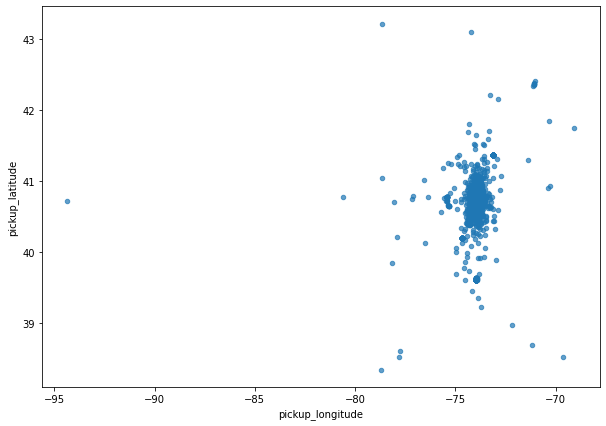

In [ ]:
# plotting after removing outliers
train.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", figsize=(10, 7), alpha=0.7)
plt.show()

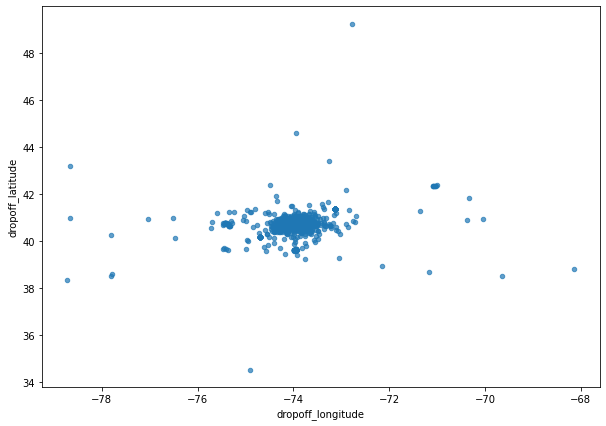

In [ ]:
train.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude", figsize=(10, 7), alpha=0.7)
plt.show()

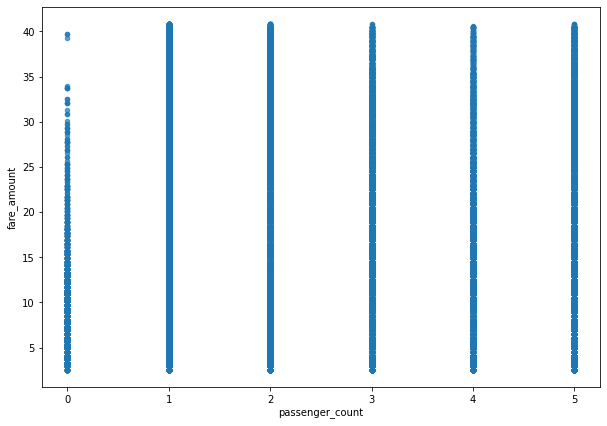

In [ ]:
train.plot(kind="scatter", x="passenger_count", y="fare_amount", figsize=(10, 7), alpha=0.7)
plt.show()

**Next let us explore the pickup latitude and longitudes**

Check the data types of each column

In [ ]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [ ]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [ ]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [ ]:
#check the dtypes after conversion
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
test.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object


First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formula boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*


In [ ]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [ ]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0       2.323260
1       2.425353
2       0.618628
3       1.961033
4       5.387301
          ...   
9732    2.461474
9733    1.488777
9734    1.609619
9735    1.666308
9736    2.396137
Length: 8665, dtype: float64

Now that we have calculated the distance, we shall create columns for the following -


*   year
*   month
*   date
*   hour
*   day of week






In [ ]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


In [ ]:
H_Distance_mean = train["H_Distance"].mean(),
H_Distance_std =  train["H_Distance"].std()
# identify outliers
H_Distance_cut_off = H_Distance_std * 3
lower, upper = H_Distance_mean - H_Distance_cut_off, H_Distance_mean + H_Distance_cut_off
# identify outliers
outliers = [x for x in train["H_Distance"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
train = train[(train["H_Distance"] >= lower[0]) & (train["H_Distance"] <= upper[0])]

Identified outliers: 3998


**1. Does the number of passengers affect the fare?**

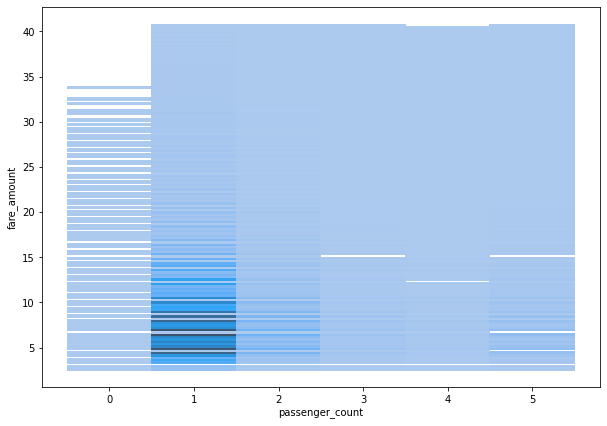

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(train, x="passenger_count", y="fare_amount",bins=150, discrete=(True, False),kde = True)

From the graph above, we can see that low passenger count has low fare amount proportionately.

**2. Does the date and time of pickup affect the fare?**

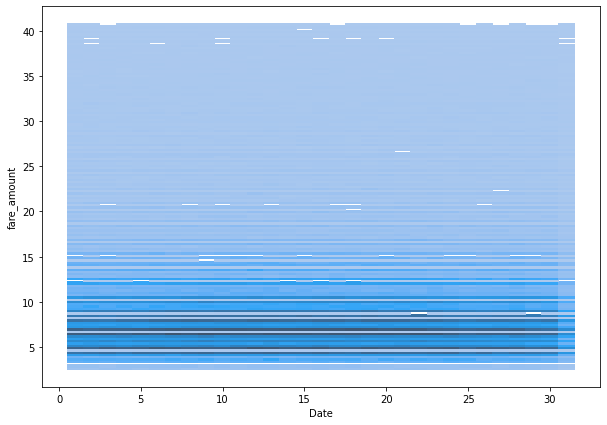

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(train, x="Date", y="fare_amount",bins=150, discrete=(True, False))

From the above graph, we can infer that the fare amount does not depend on the date.

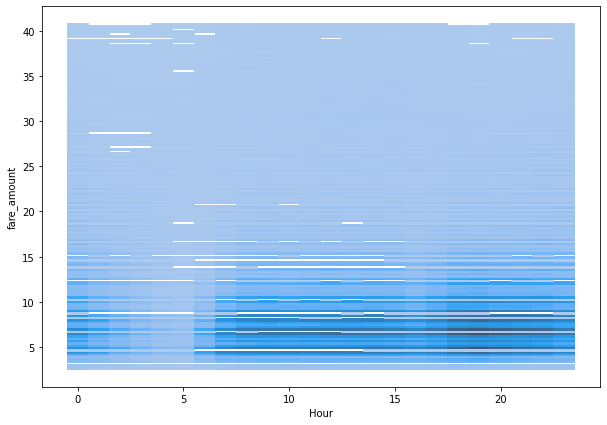

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(train, x="Hour", y="fare_amount",bins=150, discrete=(True, False))

From the above graph we can infer that people do not travel during early morning and travel more during evening and night time.

**3. Does the day of the week affect the fare?**

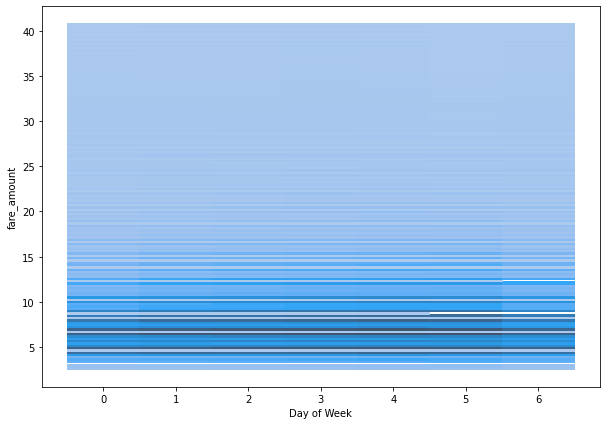

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(train, x="Day of Week", y="fare_amount",bins=150, discrete=(True, False))

From the above graph we can infer that there is very less or negligible change in fare during weekends.

**4. Does the distance affect the fare?**

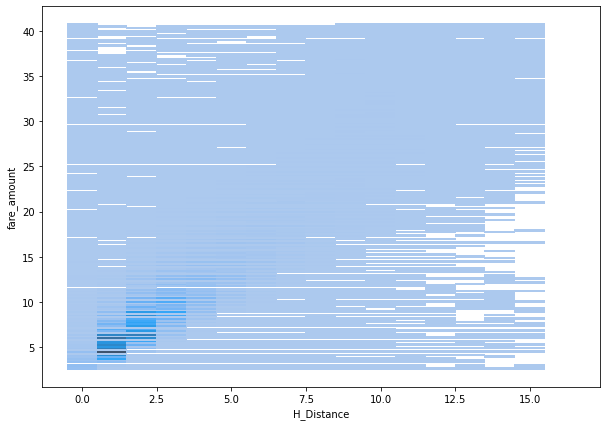

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(train, x="H_Distance", y="fare_amount",bins=200,discrete=(True, False))

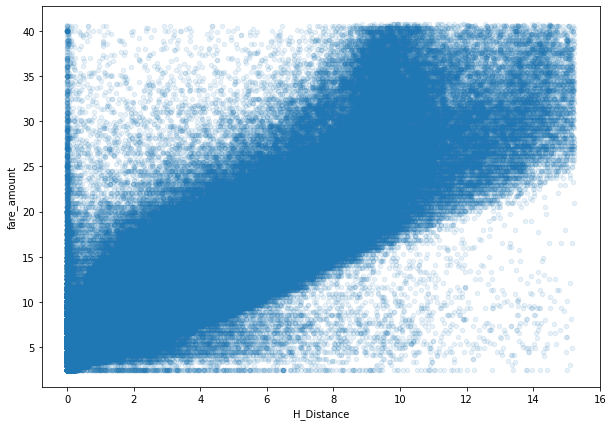

In [ ]:
train.plot(kind="scatter", x="H_Distance", y="fare_amount", figsize=(10, 7), alpha=0.1)
plt.show()

From the above graphs we can infer that fare amount is directly proprtional to H_distance. If H_distance increases,fare also increases.

##Data Scaling

In [ ]:
#check the target column
features = train.drop(["key",'fare_amount',"pickup_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1)   #Feature Matrix
target = train['fare_amount']          #Target Variable

In [ ]:
features.reset_index(drop = True)

,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,1,1.030764,2009,6,15,0,17
1,1,8.450134,2010,1,5,1,16
2,2,1.389525,2011,8,18,3,0
3,1,2.799270,2012,4,21,5,4
4,1,1.999157,2010,3,9,1,7
...,...,...,...,...,...,...,...
929204,1,1.879763,2014,9,13,5,21
929205,2,0.000000,2010,9,20,0,14
929206,5,1.761741,2013,4,26,4,14
929207,1,1.842683,2011,7,8,4,0


In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state = 0, shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features = scale_features_std.fit_transform(features)


In [ ]:
print("Size of training data :", features_train.shape)
print("Size of testing data :", features_test.shape)

Size of training data : (743367, 7)
Size of testing data : (185842, 7)


In [ ]:
features

array([[-0.51085214, -0.75381321, -1.45053263, ..., -0.07992294,
        -1.56083557,  0.5333403 ],
       [-0.51085214,  2.25165847, -0.91343442, ..., -1.23149675,
        -1.04747544,  0.38003649],
       [ 0.35455744, -0.60848457, -0.3763362 , ...,  0.26554921,
        -0.02075519, -2.07282442],
       ...,
       [ 2.95078617, -0.45770578,  0.69786024, ...,  1.18680827,
         0.49260493,  0.07342888],
       [-0.51085214, -0.42491729, -0.3763362 , ..., -0.88602461,
         0.49260493, -2.07282442],
       [-0.51085214, -0.8642848 , -1.45053263, ...,  1.76259518,
        -0.02075519,  0.07342888]])

In [ ]:
column_values = ['passenger_count', 'H_Distance', 'Year','Month', 'Date','Day of Week', 'Hour']
df = pd.DataFrame(data = features,
                  columns = column_values)
df

,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,-0.510852,-0.753813,-1.450533,-0.075697,-0.079923,-1.560836,0.533340
1,-0.510852,2.251658,-0.913434,-1.529769,-1.231497,-1.047475,0.380036
2,0.354557,-0.608485,-0.376336,0.505931,0.265549,-0.020755,-2.072824
3,-0.510852,-0.037419,0.160762,-0.657326,0.611021,1.005965,-1.459609
4,-0.510852,-0.361532,-0.913434,-0.948140,-0.770867,-1.047475,-0.999698
...,...,...,...,...,...,...,...
929204,-0.510852,-0.409897,1.234958,0.796746,-0.310238,1.005965,1.146556
929205,0.354557,-1.171360,-0.913434,0.796746,0.495864,-1.560836,0.073429
929206,2.950786,-0.457706,0.697860,-0.657326,1.186808,0.492605,0.073429
929207,-0.510852,-0.424917,-0.376336,0.215117,-0.886025,0.492605,-2.072824


In [ ]:
features = df 
features

,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,-0.510852,-0.753813,-1.450533,-0.075697,-0.079923,-1.560836,0.533340
1,-0.510852,2.251658,-0.913434,-1.529769,-1.231497,-1.047475,0.380036
2,0.354557,-0.608485,-0.376336,0.505931,0.265549,-0.020755,-2.072824
3,-0.510852,-0.037419,0.160762,-0.657326,0.611021,1.005965,-1.459609
4,-0.510852,-0.361532,-0.913434,-0.948140,-0.770867,-1.047475,-0.999698
...,...,...,...,...,...,...,...
929204,-0.510852,-0.409897,1.234958,0.796746,-0.310238,1.005965,1.146556
929205,0.354557,-1.171360,-0.913434,0.796746,0.495864,-1.560836,0.073429
929206,2.950786,-0.457706,0.697860,-0.657326,1.186808,0.492605,0.073429
929207,-0.510852,-0.424917,-0.376336,0.215117,-0.886025,0.492605,-2.072824


The requried data is scaled and standardized without a pipeline.

##Pipeline

We will use a copy of the main data to write the pipeline.

In [ ]:
trainc

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import (Pipeline, FeatureUnion)
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)

In [ ]:
# Remove 0 values

class drop_na(BaseEstimator, TransformerMixin):
    def __init__(self, col):
        self.col = col
    
    def fit(self, X, y=None):
        return self
    
    # Transform updates all NaN values with median
    def transform(self, X):
        return X.dropna(axis = 0, how ='any')

In [ ]:
# Remove negative values in fare amount

class remove_neg(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[X["fare_amount"]>0]


In [ ]:

class Outliers(BaseEstimator, TransformerMixin):
    def __init__(self, col):
        self.col = col

    def fit(self, X, y=None):
        return self

    # Remove outliers
    def transform(self, X):
        self.mean = X[self.col].mean()
        self.std = X[self.col].std()
        self.cut_off = self.std * 3
        self.lower = self.mean - self.cut_off
        self.upper = self.mean + self.cut_off
        return X[(X[self.col] >= self.lower) & (X[self.col] <= self.upper)]

In [ ]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [trainc]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

class attributes(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['key'] = pd.to_datetime(X['key'])
        X['pickup_datetime']  = pd.to_datetime(X['pickup_datetime'])
        data = [X]
        for i in data:
          i['Year'] = i['pickup_datetime'].dt.year
          i['Month'] = i['pickup_datetime'].dt.month
          i['Date'] = i['pickup_datetime'].dt.day
          i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
          i['Hour'] = i['pickup_datetime'].dt.hour
        i['H_Distance'] = haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
        return X

In [ ]:
class dropcolumns(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.drop(["key","pickup_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1) 
        return X

In [ ]:
from sklearn.pipeline import Pipeline

# This is the main pipeline object, in which we are performing four tasks
# pipeline takes list of tuples of two values as (name of transform, transform object)
pre_pipe = Pipeline([
    ('dropna', drop_na(col="fare_amount")),
    ("remove_neg",remove_neg()),
    ("outliers1",Outliers(col="fare_amount")),
    ("outliers2",Outliers(col="pickup_latitude")),
    ("outliers3",Outliers(col="pickup_longitude")),
    ("outliers4",Outliers(col="dropoff_latitude")),
    ("outliers5",Outliers(col="dropoff_longitude")),
    ("outliers6",Outliers(col="passenger_count")),
    ("attributes",attributes()),
    ("outliers7",Outliers(col='H_Distance')),
    ("dropcolumns",dropcolumns())])

train_prepared = pre_pipe.fit_transform(trainc)
y = train_prepared["fare_amount"]
X = train_prepared.drop(["fare_amount"],axis=1) 
scalar = Pipeline([('Standard_scaling', StandardScaler())])
X = scalar.fit_transform(X)
column_values = ['passenger_count', 'H_Distance', 'Year','Month', 'Date','Day of Week', 'Hour']
X = pd.DataFrame(data = X,columns = column_values)
X.reset_index(drop = True)

,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,-0.510846,-1.450583,-0.075667,-0.079934,-1.560835,0.533344,-0.758492
1,-0.510846,-0.913492,-1.529669,-1.231518,-1.047438,0.379990,2.290021
2,0.354601,-0.376402,0.505934,0.265541,-0.020642,-2.073673,-0.611082
3,-0.510846,0.160689,-0.657268,0.611016,1.006153,-1.460257,-0.031838
4,-0.510846,-0.913492,-0.948068,-0.770884,-1.047438,-1.000196,-0.360593
...,...,...,...,...,...,...,...
928063,-0.510846,1.234870,0.796734,-0.310251,1.006153,1.146760,-0.409650
928064,0.354601,-0.913492,0.796734,0.495858,-1.560835,0.073282,-1.182018
928065,2.950942,0.697780,-0.657268,1.186808,0.492755,0.073282,-0.458144
928066,-0.510846,-0.376402,0.215134,-0.886043,0.492755,-2.073673,-0.424886


The training data is cleaned,preprocessed and scaled the we have output which is a pandas dataframe ready to be fed into a regression algorithm.

In [ ]:
y = y.reset_index(drop = True)

The target values should not be scaled because we need the final value of fare amount not its scaled value as output.

In [ ]:
testc

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [ ]:
test_pre_pipe = Pipeline([
    ("outliers1",Outliers(col="pickup_latitude")),
    ("outliers2",Outliers(col="pickup_longitude")),
    ("outliers3",Outliers(col="dropoff_latitude")),
    ("outliers4",Outliers(col="dropoff_longitude")),
    ("outliers5",Outliers(col="passenger_count")),
    ("attributes",attributes()),
    ("outliers6",Outliers(col='H_Distance')),
    ("dropcolumns",dropcolumns()),
    ('Standard_scaling', StandardScaler())])

# we are calling fit_transform() on pipeline, so the pipeline is learning parameters from input data.
# Later it also transforms the input data as per the "transform()" definition of each object
test_prepared = test_pre_pipe.fit_transform(testc)
column_values = ['passenger_count', 'H_Distance', 'Year','Month', 'Date','Day of Week', 'Hour']
test_prepared = pd.DataFrame(data = test_prepared,columns = column_values)
test_prepared.reset_index(drop = True)

,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,-0.512551,1.783640,-1.735836,1.232249,-0.941641,-0.068437,-0.536416
1,-0.512551,1.783640,-1.735836,1.232249,-0.941641,-0.068437,1.197723
2,-0.512551,-0.442735,0.943381,-0.910013,1.070239,-0.360792,-0.452562
3,-0.512551,0.113859,1.538763,-1.699267,1.070239,1.100982,-0.123060
4,-0.512551,0.113859,1.538763,-1.699267,1.070239,1.100982,-0.310072
...,...,...,...,...,...,...,...
8936,2.986377,1.783640,-0.545073,1.457751,0.567269,0.662450,0.773091
8937,2.986377,1.783640,-1.438145,1.006748,-0.438671,0.662450,-0.591302
8938,2.986377,1.783640,-1.438145,-0.910013,1.573209,-0.799325,-0.476106
8939,2.986377,1.783640,-0.545073,-0.459010,-0.941641,-0.799325,-0.637022


The test pipeline is different because it does not have a target value, we need to find the target value. The functions used are same for both pipelines.

##Use of Validation Set and Cross Validation Approach

K-fold cross validation set algorithm is written from scratch using numpy.

In [ ]:
Xcopy = X.copy()
ycopy = y.copy() #copies of training data 

In [ ]:
k = 5
Xfolds = np.array_split(Xcopy, k)
yfolds = np.array_split(ycopy, k) # using numpy to split data

The cell below contains K-fold cross validation by using loops and the values from the regressions are added into a list.

In [ ]:
LinearRegressionScores = []
DecisionTreeRegressorScores = []
SGDRegressorScores = []
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

for i in range(k):
  Xtrain = []
  ytrain = []
  Xtest  = []
  ytest  = []
  Xtrain = Xfolds.copy()
  Xtest = Xfolds[i]
  ytrain = yfolds.copy()
  ytest = yfolds[i]
  del Xtrain[i]
  del ytrain[i]
  Xtrain = pd.concat(Xtrain)
  ytrain = pd.concat(ytrain)

  regr = LinearRegression()
  regr.fit(Xtrain, ytrain)
  ypred = regr.predict(Xtest)
  a = regr.score(Xtest, ytest)
  LinearRegressionScores.append(a)

  regressor = DecisionTreeRegressor(random_state = 0) 
  regressor.fit(Xtrain, ytrain)
  y_pred = regressor.predict(Xtest)
  b = regressor.score(Xtest, ytest)
  DecisionTreeRegressorScores.append(b)

  rege = SGDRegressor()
  rege.fit(Xtrain, ytrain)
  yprede = rege.predict(Xtest)
  c = rege.score(Xtest, ytest)
  SGDRegressorScores.append(c)


###Matrix based linear regression

In [ ]:
LinearRegressionscore = np.array(LinearRegressionScores)
LinearRegressionscore.mean()

0.7646597822160217

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred, squared=False)

3.0107974987318533

The accuracy is 76.465% on average.

###Optimization based linear regression

In [ ]:
SGDRegressorscore = np.array(SGDRegressorScores)
SGDRegressorscore.mean()

0.7644642334476878

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, yprede, squared=False)

3.011635511939391

The accuracy is 76.464% on average.

###Non parametric based linear regression

In [ ]:
DecisionTreeRegressorscore = np.array(DecisionTreeRegressorScores)
DecisionTreeRegressorscore.mean()

0.5850008633408146

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, y_pred, squared=False)

4.011657729269587

The accuracy is 58.50% on average. The error is high when compared to the other two models.

By observation,both Stohastic gradient descent regression and linear regression work well.

##Linear Regression

We will calculate the fare amount for the test values using SGD regressor.

In [ ]:
rege = SGDRegressor()
rege.fit(Xtrain, ytrain)
test_prediction = rege.predict(test_prepared)
test_prediction

array([ 8.1431921 , 17.32951715,  7.35498415, ...,  8.8155865 ,
        8.31707945, 11.37440673])

In [ ]:
test_prepared['predicted_fare_amount'] = test_prediction.tolist()

In [ ]:
test_prepared


,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour,predicted_fare_amount
0,-0.512551,1.783640,-1.735836,1.232249,-0.941641,-0.068437,-0.536416,8.143192
1,-0.512551,1.783640,-1.735836,1.232249,-0.941641,-0.068437,1.197723,17.329517
2,-0.512551,-0.442735,0.943381,-0.910013,1.070239,-0.360792,-0.452562,7.354984
3,-0.512551,0.113859,1.538763,-1.699267,1.070239,1.100982,-0.123060,9.805103
4,-0.512551,0.113859,1.538763,-1.699267,1.070239,1.100982,-0.310072,8.814439
...,...,...,...,...,...,...,...,...
8936,2.986377,1.783640,-0.545073,1.457751,0.567269,0.662450,0.773091,15.776781
8937,2.986377,1.783640,-1.438145,1.006748,-0.438671,0.662450,-0.591302,8.428560
8938,2.986377,1.783640,-1.438145,-0.910013,1.573209,-0.799325,-0.476106,8.815586
8939,2.986377,1.783640,-0.545073,-0.459010,-0.941641,-0.799325,-0.637022,8.317079


We get the predicted fare amounts for the test values which are scaled and standardized in the pipeline.







